# TikTakToe mit Q-Learning

#### ABSTRAKT

In diesem Projekt versuche ich erst mit klassischem modellfreiem Q-Learning und dann mit Deep Q-Learning einem Agenten beizubringen TikTakToe zu spielen.
Dabei trainiere ich den Agenten gegen einen RandomPlayer, der immer zufällig einen beliebigen legalen Zug macht.
Eine andere Option wäre ein perfekter Gegner gewesen (z.B: ein Treesearch Algorithmus), der jedes Spiel mit Unentschieden beenden kann, sofern man ihm keine Chance gibt zu gewinnen.
Das Spiel TikTakToe ist klein genug, um durch Bruteforcing immer den perfekten Zug wissen zu können.

Das Ziel gegen den RandomPlayer soll also in erster Linie nicht sein zu gewinnen, sondern nicht zu verlieren. Dies ist in 100% aller Spiele möglich, egal, wer beginnt.

#### CODEBASE AUFBAU

Die gesamte Spiellogik ist in <b>tiktaktoe.py</b> .<br>
Die notebooks endend auf <b>*_gym</b>.ipynb sind jeweils Versuchsaufbaue für das Training von Agenten mit verschiedenen Methoden des Q-Learnings.<br><br>
<b>/images</b> enthält Schaubilder für dieses README.<br>
<b>/venv</b> enthält die virtuelle Pythonumgebung für dieses Projekt.<br>
<b>/qtables</b> enthält vortrainierte Q-Tabellen, die man bei bedarf laden kann.<br>
<br><br>
In <b>game.ipynb</b> (und ganz unten in diesem jupyter notebook) kann man <b>selbst gegen die KI antreten.</b><br>



### TikTakToe mit klassischem Q-Learning

Hier trifft der Agent anhand einer ihm gegebenen Q-Table eine Entscheidung.
Da die Rewards in TikTakToe sehr bescheiden verteilt sind (es gibt erst nach abgeschlossenem Spiel Rückmeldung an den Agent), wird jede vom Agenten getroffenen Entscheidung erst nach dem Spiel belohnt oder bestraft.<br>

Der Hyperparameter Epsilon gibt an, zu welcher Wahrscheinlichkeit der Agent im Training eine von der Q-Table unabhängige Entscheidung per Zufall trifft.<br>
In den Schaubildern ist zu sehen, wie ich an Epsilon herumspiele, um zu sehen, wie es sich auf das Training des Agenten auswirkt.

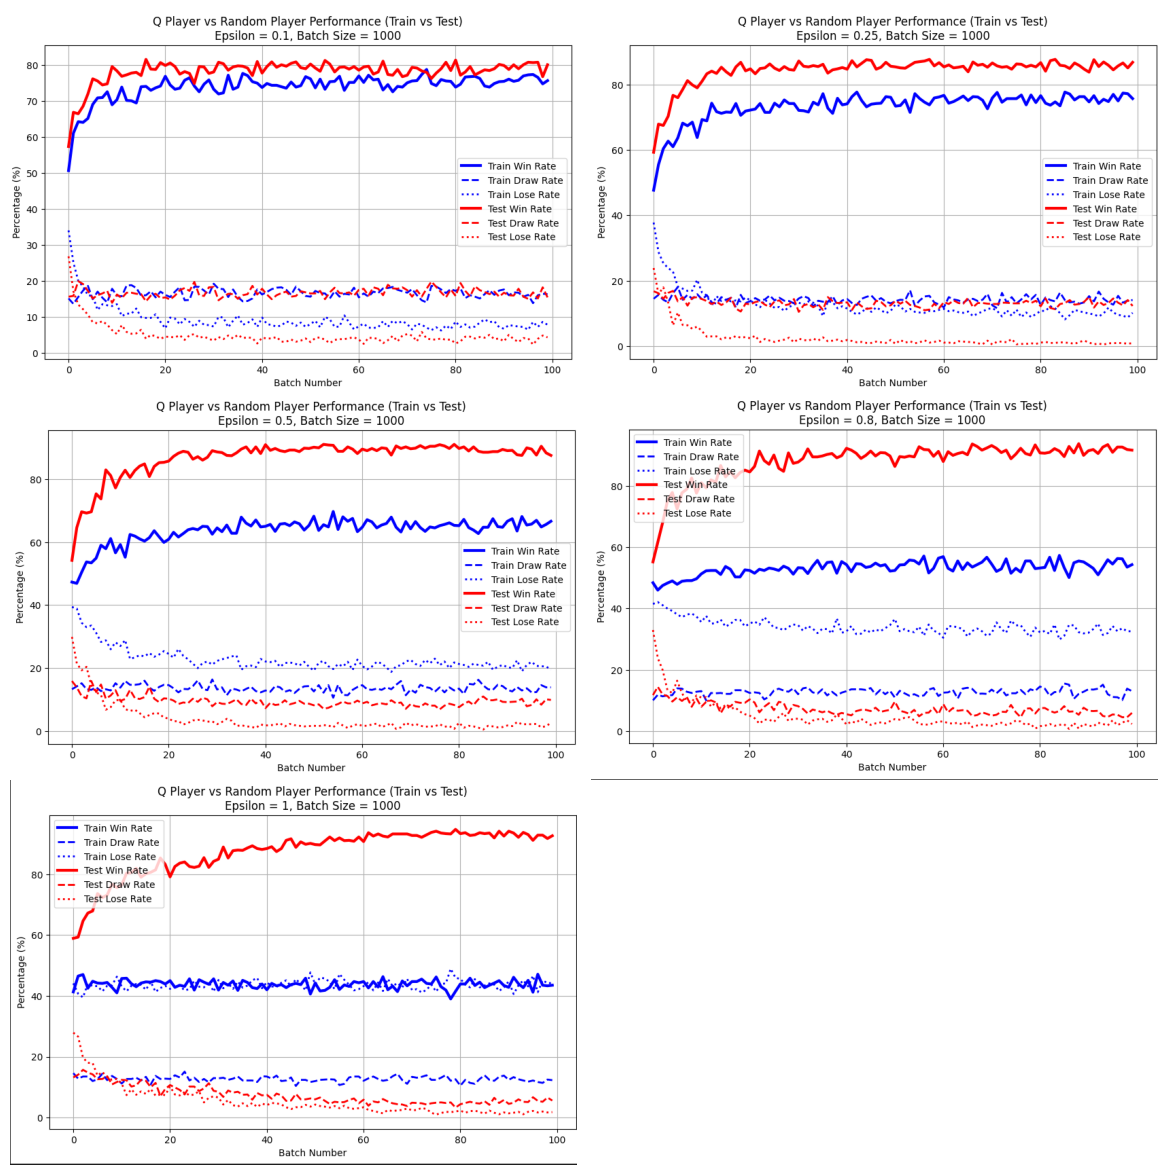

In [9]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to your folder containing images
image_folder = 'images/plots/100batches'  # Update this to your actual folder path

# Get a list of all .png files in the folder
images = sorted([img for img in os.listdir(image_folder) if img.endswith('.png')])

# Calculate number of images and rows
num_images = len(images)
num_cols = 2  # Fixed number of columns
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed

# Set up the plot
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on number of rows

# Display images in a 2-column grid
for i, img in enumerate(images):
    img_path = os.path.join(image_folder, img)
    img_data = mpimg.imread(img_path)
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each image
    plt.imshow(img_data)
    plt.axis('off')  # Hide axes

# Adjust the layout to remove borders
plt.subplots_adjust(wspace=0, hspace=0)  # Set width and height space to 0

plt.show()


Hier trainiere ich den Agenten gegen ihn selbst, und lasse ihn in der Testphase gegen den RandomPlayer antreten.
Das Training verläuft schneller. Insgesamt steigt die Performanz des Agenten aber nicht.

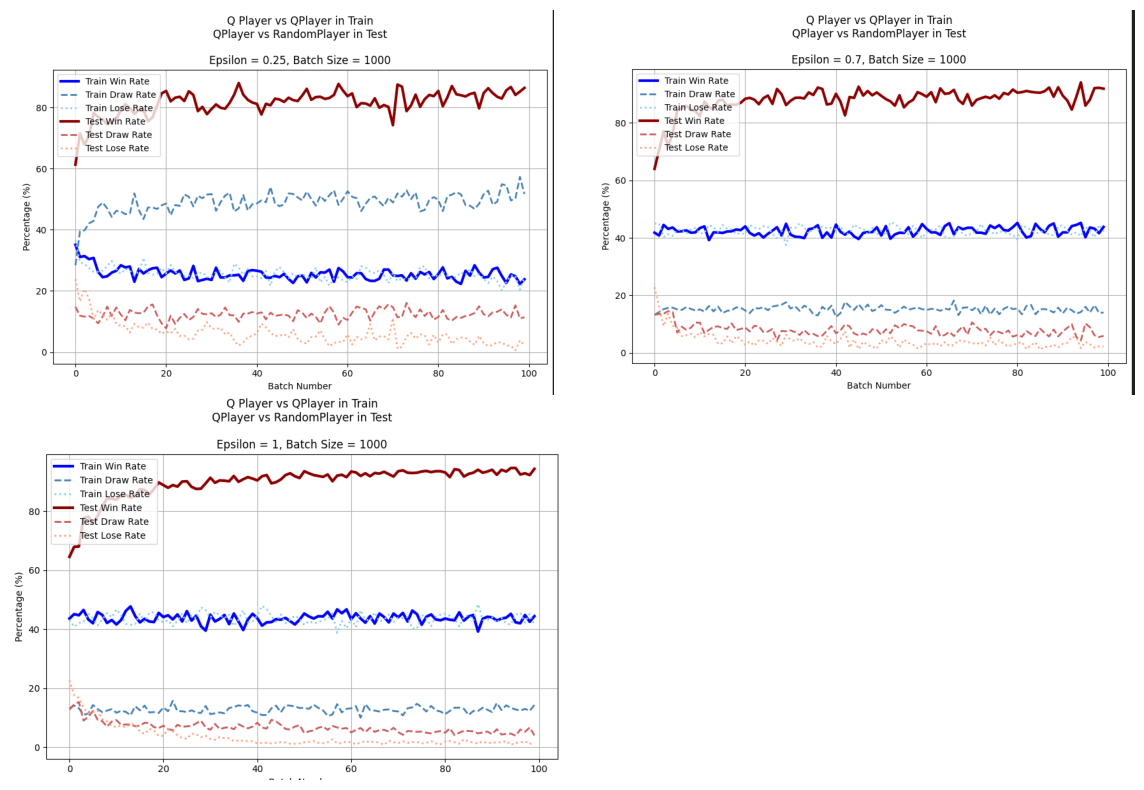

In [11]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to your folder containing images
image_folder = 'images/plots/qplayervsrandom'  # Update this to your actual folder path

# Get a list of all .png files in the folder
images = sorted([img for img in os.listdir(image_folder) if img.endswith('.png')])

# Calculate number of images and rows
num_images = len(images)
num_cols = 2  # Fixed number of columns
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed

# Set up the plot
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on number of rows

# Display images in a 2-column grid
for i, img in enumerate(images):
    img_path = os.path.join(image_folder, img)
    img_data = mpimg.imread(img_path)
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each image
    plt.imshow(img_data)
    plt.axis('off')  # Hide axes

# Adjust the layout to remove borders
plt.subplots_adjust(wspace=0, hspace=0)  # Set width and height space to 0

plt.show()



Je höher Epsilon, desto mehr unterscheidet sich die Performanz des Agenten zwischen Trainings- und Testphase.<br>
Interessanterweise werden mit Epsilon = 1 bei weitem die besten Ergebnisse in der Testphase erziehlt, mit einer Wahrscheinlichkeit zu verlieren von wenigen Prozent. Ich denke, das liegt daran, dass durch eine rein zufällige Wahl viele verschiedene Spielmöglichkeiten entdeckt und deren Konsequenzen gelernt werden.<br><br>

Um diese Theorie zu testen, lasse ich die nächsten Agenten für jeweils eine Million Spiele trainieren.

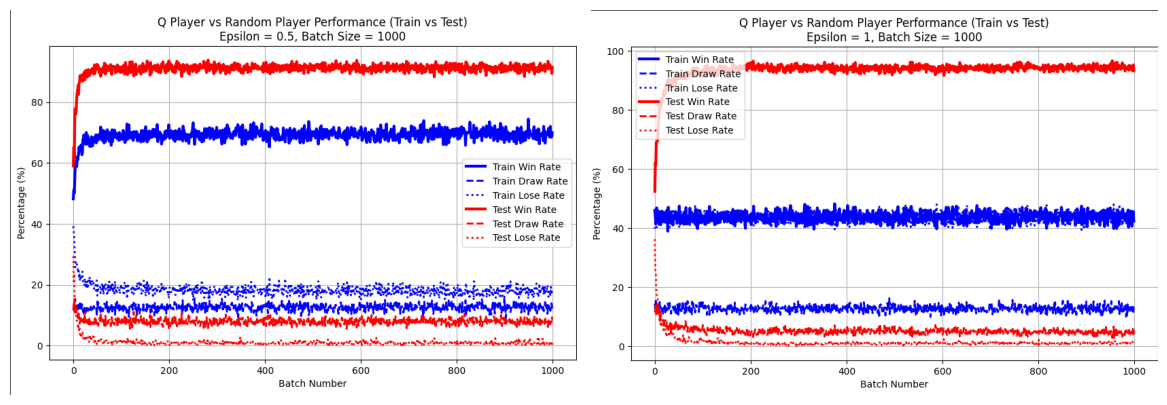

In [10]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to your folder containing images
image_folder = 'images/plots/1000batches'  # Update this to your actual folder path

# Get a list of all .png files in the folder
images = sorted([img for img in os.listdir(image_folder) if img.endswith('.png')])

# Calculate number of images and rows
num_images = len(images)
num_cols = 2  # Fixed number of columns
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed

# Set up the plot
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on number of rows

# Display images in a 2-column grid
for i, img in enumerate(images):
    img_path = os.path.join(image_folder, img)
    img_data = mpimg.imread(img_path)
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each image
    plt.imshow(img_data)
    plt.axis('off')  # Hide axes

# Adjust the layout to remove borders
plt.subplots_adjust(wspace=0, hspace=0)  # Set width and height space to 0

plt.show()


Es ist eindeutig zu sehen, dass wir auf eine Blockade treffen, und der Agent reelativ schnell nicht mehr besser zu werden scheint.
Kurioserweise performt der Agent mit Epsilon = 0.5 hier besser, als der mit 1, was die Theorie untersützt, dass nicht unbedingt ein hohes Epsilon von Vorteil ist, sondern das Erkunden möglichst vieler Spielstände.<br>



Mit klassischem Q-Learning habe ich es nicht geschafft, einen Agenten zu trainieren, der nie verliert.

### TikTakToe mit NN Agent


Dies ist meine eigene Vorstufe zum Deep Q-Learning, in der ich lediglich die Q-Table argmax Funktion durch ein einfaches neuronales Netwerk ersetze, das stattdessen eine Entscheidung trifft.

Hier trainiere ich einen Agenten jeweils für 50.000 Spiele und schaue wieder, welches Epsilon die besten Ergebnisse liefert.<br>

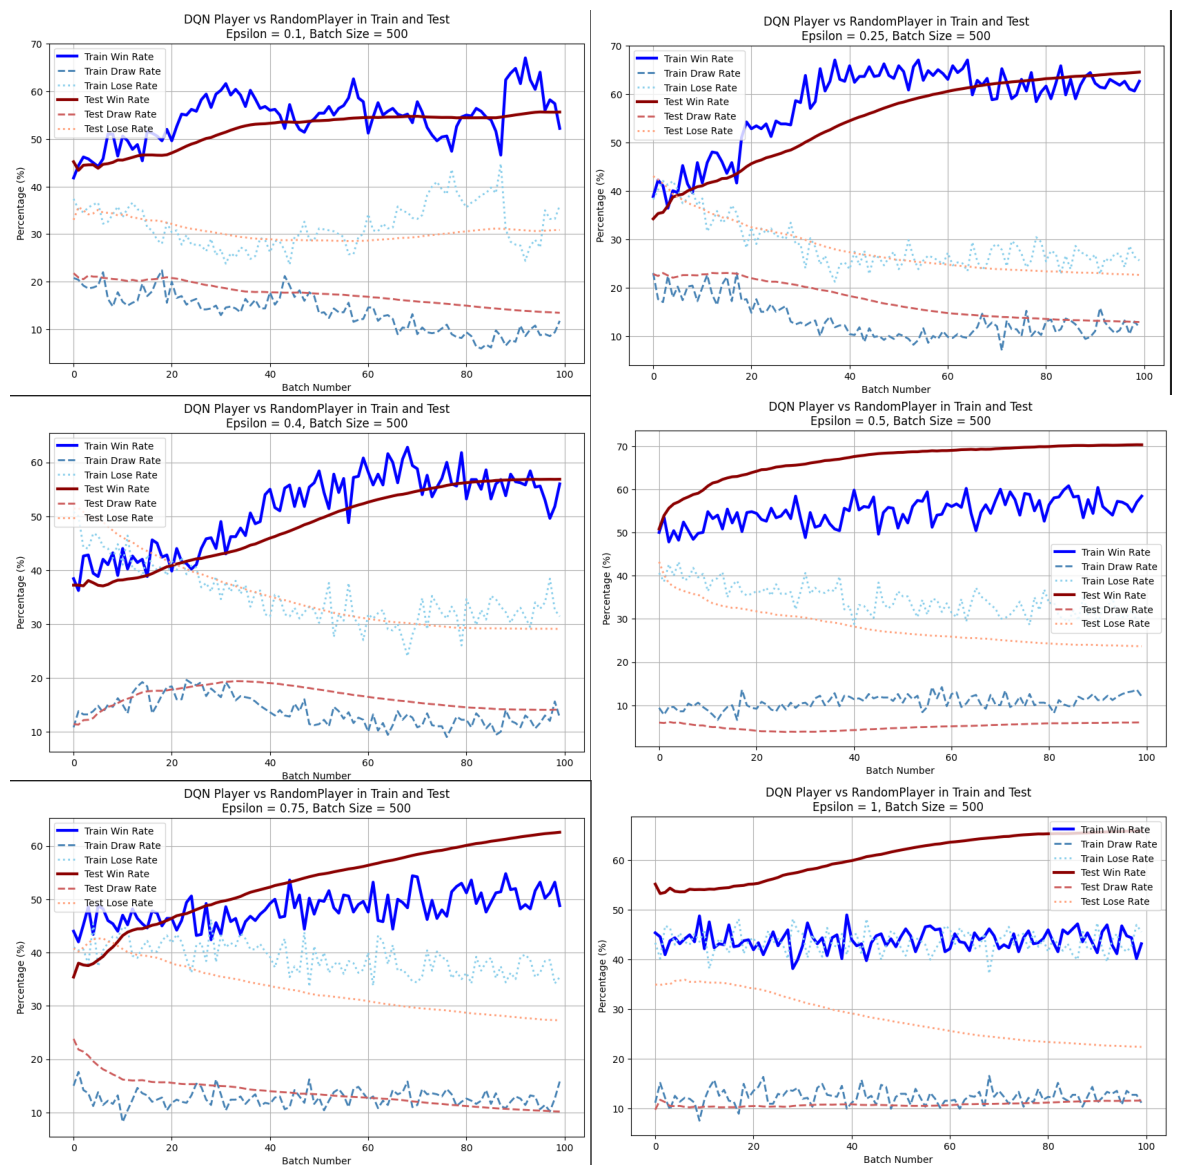

In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set the path to your folder containing images
image_folder = 'images/plots/NN/50k_games'  # Update this to your actual folder path

# Get a list of all .png files in the folder
images = sorted([img for img in os.listdir(image_folder) if img.endswith('.png')])

# Calculate number of images and rows
num_images = len(images)
num_cols = 2  # Fixed number of columns
num_rows = (num_images + num_cols - 1) // num_cols  # Calculate number of rows needed

# Set up the plot
plt.figure(figsize=(15, num_rows * 5))  # Adjust height based on number of rows

# Display images in a 2-column grid
for i, img in enumerate(images):
    img_path = os.path.join(image_folder, img)
    img_data = mpimg.imread(img_path)
    plt.subplot(num_rows, num_cols, i + 1)  # Create a subplot for each image
    plt.imshow(img_data)
    plt.axis('off')  # Hide axes

# Adjust the layout to remove borders
plt.subplots_adjust(wspace=0, hspace=0)  # Set width and height space to 0

plt.show()


Ein Epsilon von 0.5 scheint bei einem NN eine gute Wahl zu sein.
<br><br>

Hier trainieren wir über 1 Million Spiele, ohne Erfolg.<br>

![Schaubild](images/plots/NN/1Mgames_epsilon0.5.png)

### Deep Q-Learning TikTakToe

Es wird Zeit für das ändern anderer Hyperparameter und das Berücksichtigen des jeweils nächsten Spielzustands im experience replay learning. 

!['schaubild'](images/plots/DQNwith_next_state/50k_games_epsilon0.5.png)

Ich passe die Belohnungen an, da die Loserate viel zu hoch ist. Die Minusbelohnung für Verlieren wurde von -10 auf -20 erhöht. Wir sehen weniger Niederlagen für den Agent!

!['schaubild'](images/plots/DQNwith_next_state/50k_games_epsilon0.5v2_updated_rewards.png)

Hier ist die Minusbelohnung für Niederlagen noch stärker erhöht. Wir gewinnen öfter, verlieren aber genauso oft.

!['schaubild'](images/plots/DQNwith_next_state/50k_games_epsilon0.5_v3_adjusted_rewards.png)

Ein weiteres Mögliches Bottleneck ist die Modellgröße, also verdoppele ich die Anzahl der Neuronen des ersten hidden layers.

!['schaubild'](images/plots/DQNwith_next_state/50k_games_epsilon0.5v3_increased_model_size.png)



### Einführung von Discount in den Belohnungen

Vielleicht ist es nicht die beste Idee, jedem Spielzug nach Spielende die gleiche Belohnung zu geben.
Ich benutze die Formel: $$discount = 1 / (züge / indexzug)$$
$$reward_{step} = reward_{final} * discount$$

Bei einem Spiel, in dem der Agent 3 Züge zum Sieg brauchte, bekommt Zug 1 $\frac{1}{3}$, Zug 2 $\frac{2}{3}$ und Zug 3 mit 100% der Belohnung.

<br>Dieser Gedanke wurde mit schöneren Lernkurven belohnt:

!['schaubild'](images/plots/DQNwith_next_state/50k_games_epsilon0.5_v4_added_discount.png)

Da die Kurven am Ende des Graphen noch nicht konvergieren, trainiere ich jetzt über eine größere Anzahl Spiele. 

!['schaubild'](images/plots/DQNwith_next_state/100k_games.png)

Ich versuche nun, die Minusbelohnung für Niederlagen mit der Zeit zu erhöhen, da ich glaube, dass das Modell im späten Training zu selten verliert, damit die Minusbelohnungen eine Wirkung haben.

!['schaubild'](images/plots/DQNwith_next_state/100k_games_lose_increase_overtime.png)


Auf der Suche nach weiteren Bottlenecks mache ich das Modell noch größer. Mehr Neuronen und ein vierter hidden layer kommen hinzu.

!['schaubild'](images/plots/DQNwith_next_state/100k_games_lose_added_4th_layer.png)


Die Kurven flachen nicht ab, also erhöhe ich nochmal die Anzahl der Spiele, über die Trainiert wird, auf 300.000.

!['schaubild'](images/plots/DQNwith_next_state/300k_games.png)

Ich lasse Epsilon nun auch über die Zeit des Trainings schrumpfen, weil es vielleicht nichts bringt, das Modell auf so viele zufällige Entscheidungen zu trainieren, wenn es sich zum Ende des Trainings hin schon relalativ sicher ist, was es tun will.

<br>
Alle 10 Batches rechnen wir: Epsilon = Epsilon * 0.9

!['schaubild'](images/plots/DQNwith_next_state/300k_games_decreasing_epsilon.png)

Mit Erfolg erreicht der DQN Agent zum ersten mal zuverlässig Loserates von <5%. Der beste Agent bleibt aber der Modellfreie Q-Table-Agent.

### Spiele gegen den Agenten!

Fazit:
Es ist nicht schwer, gegen das den DQN Agenten zu gewinnen.
Wahrscheinlich würde der Agent viel besser funktionieren, wenn man ihn gegen einen perfekten deterministischen Algorithmus trainieren lässt, der keine Chance auslässt, an einen Sieg zu kommen.

In [4]:
from tiktaktoe import *
from IPython.display import clear_output

model = NN()
model.load_state_dict(torch.load('dqn_model.pth'))
model.eval()

player_1 = InputPlayer()
player_2 = NNPlayer(model)
#player_2 = RandomPlayer()

game = TikTakToe(starting_player_x=player_1, second_player_o=player_2)


game.reset()

while game.is_ongoing:
    player_1.take_field(game)
    if not game.is_ongoing:
        break
    player_2.take_field(game)
    game.print()
    
game.print()
print(game.result)

/tmp/ipykernel_7065/3828941488.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('dqn_model.pth'))


[['O' '-' '-']
 ['-' '-' '-']
 ['X' '-' '-']]
[['O' '-' 'X']
 ['-' 'O' '-']
 ['X' '-' '-']]
[['O' '-' 'X']
 ['O' 'O' '-']
 ['X' '-' 'X']]
[['O' '-' 'X']
 ['O' 'O' '-']
 ['X' 'X' 'X']]
x_win
